In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def tanh(x):
    return 1/(((np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))))

def relu(x):
    return np.maximum(0,x)

In [4]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_derivative(x):
    return 1-np.power(tanh(x),2)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

In [19]:
x = np.arange(-10.0,10.0,0.1)
#print(x)

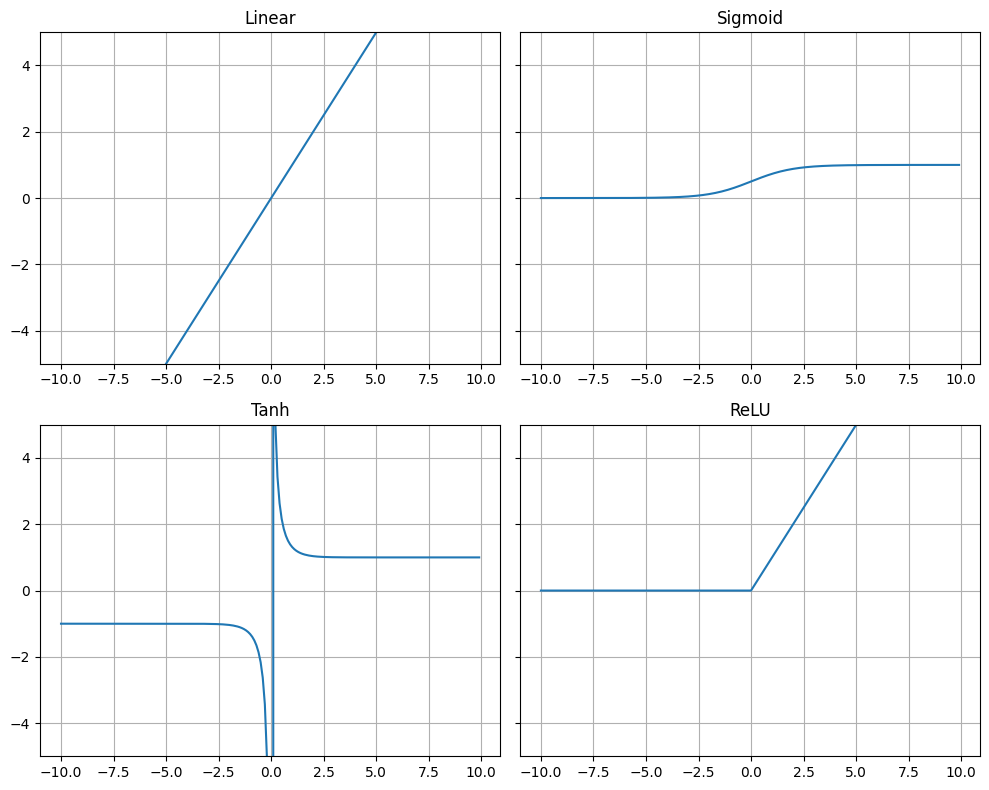

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

axs[0, 0].plot(x, x)
axs[0, 0].set_title("Linear")

axs[0, 1].plot(x, sigmoid(x))
axs[0, 1].set_title("Sigmoid")

axs[1, 0].plot(x, tanh(x))
axs[1, 0].set_title("Tanh")

axs[1, 1].plot(x, relu(x))
axs[1, 1].set_title("ReLU")

for ax in axs.flat:
    ax.set_ylim([-5, 5])
    ax.grid(True)

plt.tight_layout()
plt.show()

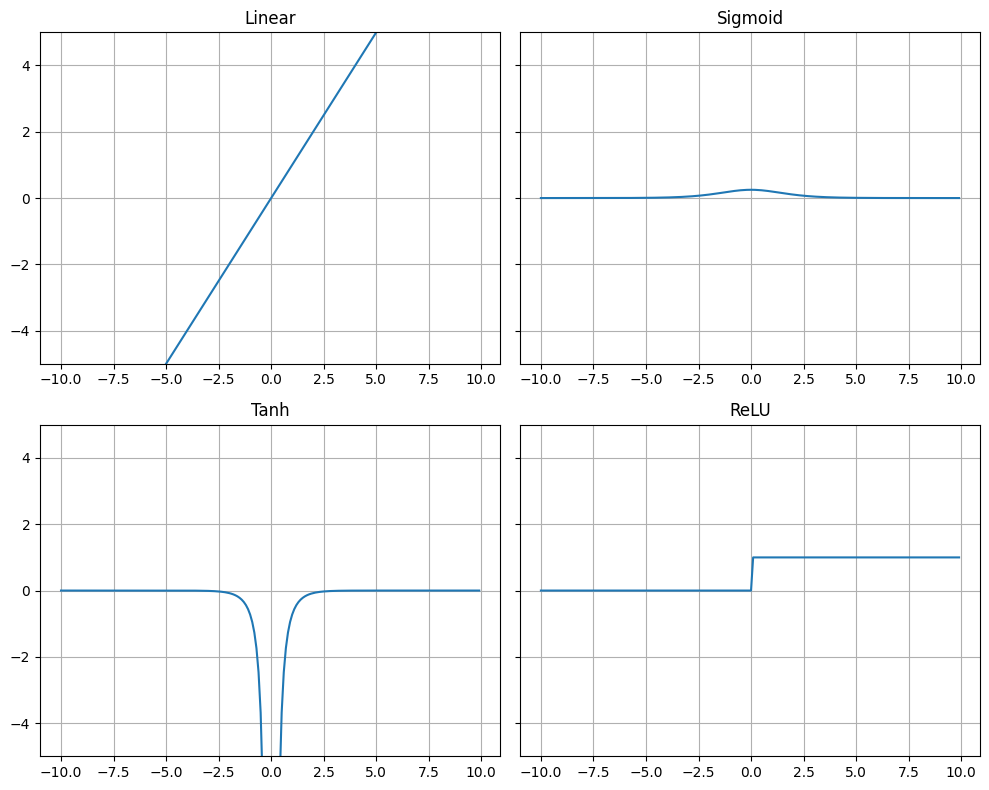

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

axs[0, 0].plot(x, x)
axs[0, 0].set_title("Linear")

axs[0, 1].plot(x, sigmoid_derivative(x))
axs[0, 1].set_title("Sigmoid")

axs[1, 0].plot(x, tanh_derivative(x))
axs[1, 0].set_title("Tanh")

axs[1, 1].plot(x, relu_derivative(x))
axs[1, 1].set_title("ReLU")

for ax in axs.flat:
    ax.set_ylim([-5, 5])
    ax.grid(True)

plt.tight_layout()
plt.show()